## Grupo 44:
* Enrique Cortina Bermúdez de Castro
* Miguel Alejandro Ponce Proaño

The EU contributes 18% of total global warming gas emissions; However, it is increasingly determined to take the lead in the fight against climate change. That is why it has set itself the goal of reaching zero carbon emissions by 2050.

To this end, it has put in place a wealth of resources to help achieve this goal over the next few years, and it will need your help to do so.

Dataset
This dataset contains data on industrial facilities and emissions across Europe.
The dataset will consist of the following variables of interest:

countryName: Country in which the facility is located

EPRETRSectorCode: Code of the sector in which the company specialises

eptrSectorName: Name of the sector in which it specialises

EPRTRAnnexIMainActivityCode: Code of the specialisation within the sector in which they operate

EPRTRAnnexIMainActivityLabel: Specialisation within the sector in which they operate

FacilityInspireID: Building identifier

facilityName: Name of the building in which the activity takes place

City: City in which the facility is located

CITY ID: ID to confirm location

targetRelease: Type of polluter to study

pollutant: Type of pollutant emitted (Target variable). In order to follow the same standard, you must encode this variables as follows:

pollutant	number
Nitrogen oxides (NOX)	0
Carbon dioxide (CO2)	1
Methane (CH4)	2
DAY: Day on which the report is made

MONTH: Reporting month

reportingYear: Reporting year

CONTINENT: Continent on which the company is located

max_wind_speed: Maximum wind speed

avg_wind_speed: Average wind speed

min_wind_speed: Minimum wind speed

max_temp: Maximum temperature

avg_temp: Average temperature

min_temp: Minimum temperature

DAYS WITH FOG: Total days of the month recorded in the area

REPORTER NAME: Reporter's name

The dataset is split into Training Dataset and Testing Dataset.

fragmentation
To train the model, the training dataset has to be used. It is fragmented in different datasets and in different formats.

To get the CSV files:
Click here to download the dataset train1: Download train1

Click here to download the dataset train2: Download train2

To get the JSON, you must use the API with the following endpoints:
For train3:

http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/first

For train4:

http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/second

For train5:

http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/third

To get de PDFs, you must download the following zip file:
Click here to download the zip file with the PDFs: Download train6

To make the predictions:
Click here to download dataset for testing: Download test_x

Task
Create a model to predict the pollutant variable in the test_x dataset.
Create a presentation (MAX 4 slides) explaining what you have done and why you have done it.. (Example: Download example )
✅ Submission
You need to submit the project individually and indicate in the README if you are part of a team, who are your teammates and the number of your team.



In [ ]:
!pip install feature-engine==1.1.2

In [ ]:
!pip install pycaret

  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Librerias

In [ ]:
# https://nuwe.io/challenge/data-science-se
import pandas as pd
from zipfile import ZipFile
import glob, os
# import PyPDF2

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from feature_engine.creation import MathematicalCombination, CombineWithReferenceFeature
import itertools

## Cargar Data Sets

In [ ]:
# https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricES22/final/train6.zip

train1 = pd.read_csv('https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricES22/final/train1.csv')
train2 = pd.read_csv('https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricES22/final/train2.csv', sep=';')

In [ ]:
traincsv = pd.concat([train1, train2])

In [ ]:
train3 = pd.read_json('http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/first')
train4 = pd.read_json('http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/second')
train5 = pd.read_json('http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/third')

In [ ]:
trainjson = pd.concat([train3, train4, train5])

## Pipelines

In [ ]:
# Un transformador para remover columnas indeseadas
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Primero realizamos la cópia del DataFrame 'X' de entrada
        data = X.copy()
        # Retornamos um nuevo dataframe sin las colunmas indeseadas
        return data.drop(labels=self.columns, axis='columns')

In [ ]:
class ConvertirColumnasCategoricas(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def convertirCategoricas(self,df_base):
      for columna in self.columns:
        df_base[columna] = df_base[columna].astype('category')
      return df_base

    def transform(self, X):
        # Primero realizamos la cópia del DataFrame 'X' de entrada
        data = X.copy()        
        return self.convertirCategoricas(data)

In [ ]:
class CombinarDataSets(BaseEstimator, TransformerMixin):
   
    def fit(self, X, y=None):
        return self

    def transform(self, X):     
        return pd.concat(X, axis=0, ignore_index=True)

In [ ]:
class CrearNuevosRangosColumnas(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def conditions(countryName, row):
      if (row['countryNameCounts'] >= 1800 and row['countryNameCounts'] < 3000):
          return '1800-3000'
      if (row['countryNameCounts'] >= 800 and row['countryNameCounts'] < 1800):
          return '800-1800'
      if (row['countryNameCounts'] < 800):
          return '<800'
      else:
          return row['countryName']

    def crearRangoPais(self, df_base):
      df_base['countryNameCounts'] = df_base.groupby('countryName')['countryName'].transform('count')
      df_base['countryNameBalanced'] = df_base.apply(self.conditions, axis=1)    
      return  df_base.drop(labels=['countryNameCounts'], axis='columns')
    
    def conditionsSector(countryName, row):
      if (row['eprtrSectorNameCounts'] < 10000):
          return 'other'
      else:
          return row['eprtrSectorName']
    
    def crearRangoSector(self, df_base):
      df_base['eprtrSectorNameCounts'] = df_base.groupby('eprtrSectorName')['eprtrSectorName'].transform('count')
      df_base['eprtrSectorNameBalanced'] = df_base.apply(self.conditionsSector, axis=1)    
      return  df_base.drop(labels=['eprtrSectorNameCounts'], axis='columns')

    def transform(self, X):
      # Primero realizamos la cópia del DataFrame 'X' de entrada
      data = X.copy()     
      dfRangoPais = self.crearRangoPais(data)
      dfRangoSector = self.crearRangoSector(dfRangoPais)
      return dfRangoSector  

In [ ]:
class CrearNuevasFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
           
    def transform(self, X):
        data = X.copy()
        columnas_modelo =  self.columns
        print(columnas_modelo)
        transformaciones = []
        for L in range(2, 4):
            for subset in itertools.combinations(columnas_modelo, L):
              print(list(subset))
              combinator = MathematicalCombination(
                    variables_to_combine=list(subset),
                    math_operations = ['sum', 'prod', 'mean', 'std', 'max', 'min']
                )
              data_temp = combinator.fit_transform(data[columnas_modelo])
              transformaciones.append(data_temp)
                 
        data_transforms = pd.concat(transformaciones,axis=1) 
        data_final =  pd.concat([data,data_transforms],axis=1)
        return data_final.loc[:,~data_final.columns.duplicated()]

In [ ]:
from sklearn.preprocessing import LabelEncoder
class DataLabelEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X):
        return self
    
    def transform(self, X):    
        df_temp = X.copy()      
        encoder = LabelEncoder()
        df_encoder= df_temp[self.columns].apply(encoder.fit_transform)             
        X[self.columns] = df_encoder
        return X

In [ ]:
train = CombinarDataSets().fit_transform(X=[traincsv,trainjson])

In [ ]:
train.head()

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,...,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID,,EPRTRAnnexIMainActivityCode,EPRTRSectorCode
0,Germany,Mineral industry,Installations for the production of cement cli...,https://registry.gdi-de.org/id/de.ni.mu/062217...,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,10,...,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f,NaN,NaN,NaN
1,Italy,Mineral industry,Installations for the production of cement cli...,IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,9,...,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963,NaN,NaN,NaN
2,Spain,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,2,...,17.103930,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada,NaN,NaN,NaN
3,Czechia,Energy sector,Thermal power stations and other combustion in...,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,8,...,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2,NaN,NaN,NaN
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/Productio...,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...",Tampere,AIR,Methane (CH4),2018,12,...,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a,NaN,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65628 entries, 0 to 65627
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   countryName                   65628 non-null  object 
 1   eprtrSectorName               65628 non-null  object 
 2   EPRTRAnnexIMainActivityLabel  65628 non-null  object 
 3   FacilityInspireID             65628 non-null  object 
 4   facilityName                  65628 non-null  object 
 5   City                          65628 non-null  object 
 6   targetRelease                 65628 non-null  object 
 7   pollutant                     65628 non-null  object 
 8   reportingYear                 65628 non-null  int64  
 9   MONTH                         65628 non-null  int64  
 10  DAY                           65628 non-null  int64  
 11  CONTINENT                     65628 non-null  object 
 12  max_wind_speed                65628 non-null  float64
 13  a

## Identificación de columas duplicadas

In [ ]:
len(train['CITY ID'].unique())

5136

In [ ]:
len(train['City'].unique())

5136

In [ ]:
len(train['EPRTRAnnexIMainActivityCode'].unique())

71

In [ ]:
len(train['EPRTRAnnexIMainActivityLabel'].unique())

71

## Comparacion de Variables

In [ ]:
sns.set(style="ticks", color_codes=True)
#sns.pairplot(train)

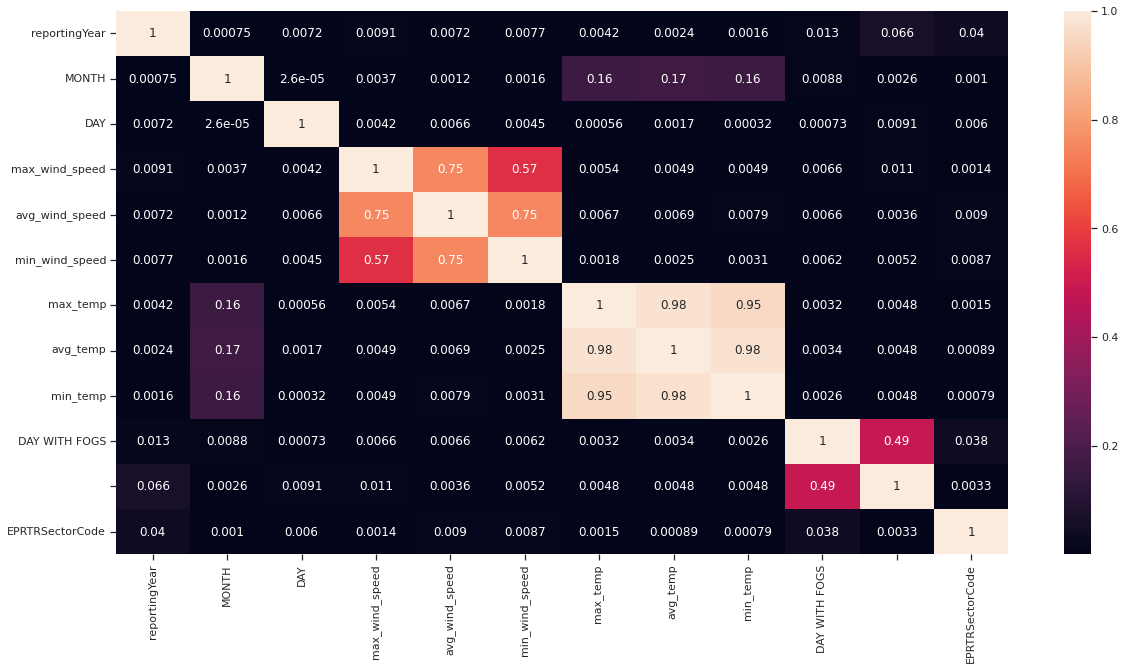

In [ ]:
def graficar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    plt.figure(figsize = (20, 10))
    sns.heatmap(df_temp[var_num].corr().abs(), annot = True)
graficar_correlaciones(train)

## Grafica las columnas categoricas

In [ ]:
def graficar_count_plot(df_base,columnas):
  for columna in columnas:
    ax = sns.countplot(x=columna, data=df_base)
    ax.tick_params(axis='x', rotation=90)    
    plt.show()

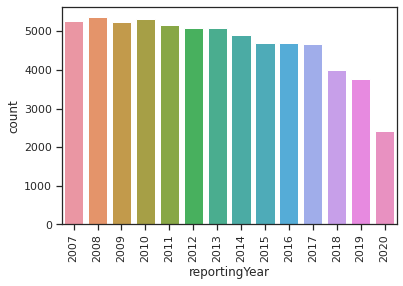

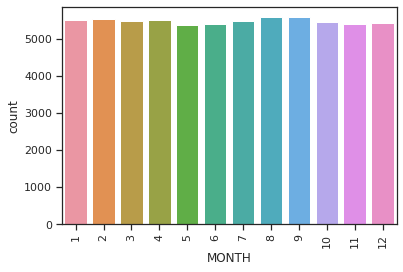

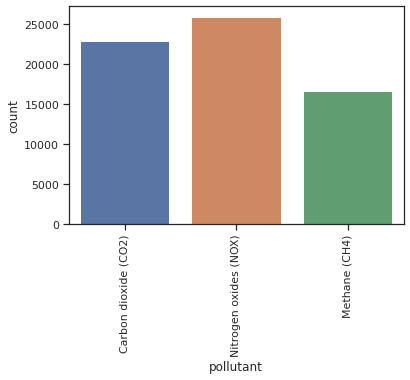

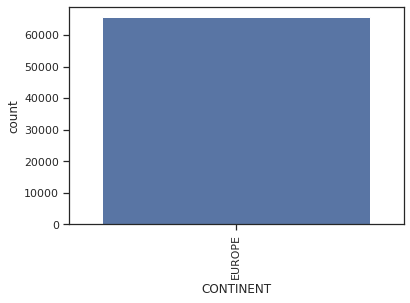

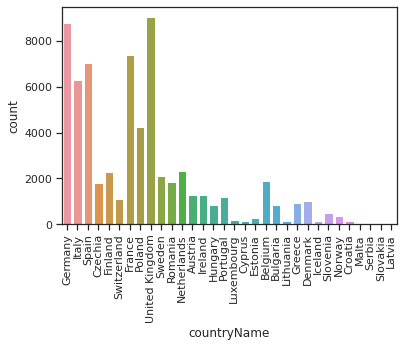

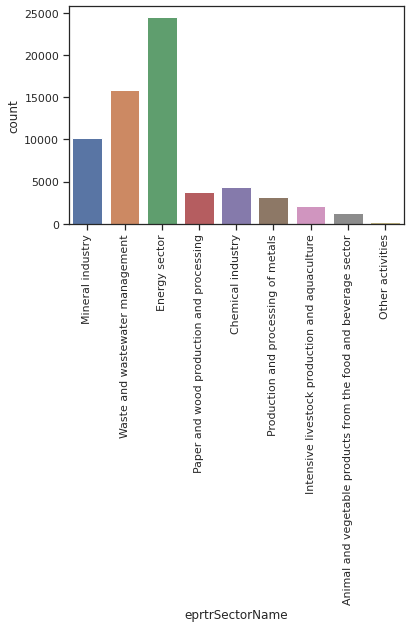

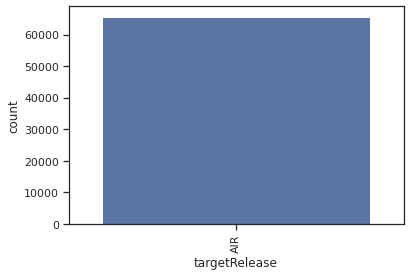

In [ ]:
columnas_categoricas = ['reportingYear','MONTH','pollutant','CONTINENT','countryName','eprtrSectorName','targetRelease']
graficar_count_plot(train,columnas_categoricas)

## Crear nuevas caracteristicas

In [ ]:
train = CrearNuevosRangosColumnas().fit_transform(X=train)

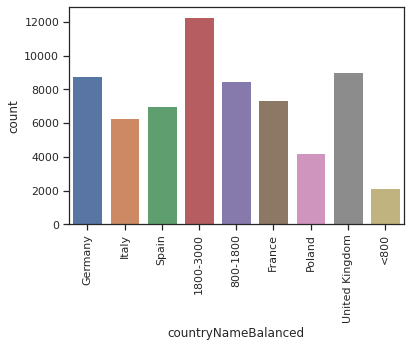

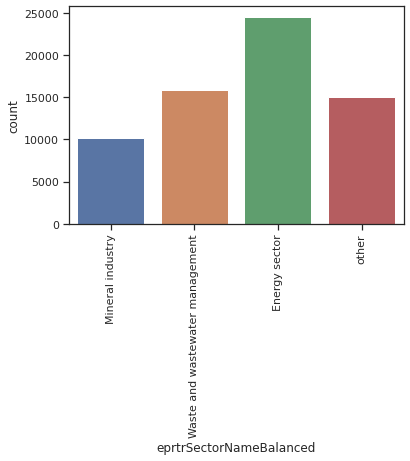

In [ ]:
graficar_count_plot(train,['countryNameBalanced','eprtrSectorNameBalanced'])

In [ ]:
#columnas_modelo = ['DAY WITH FOGS' ]
#train = CrearNuevasFeatures(columns=columnas_modelo).fit_transform(X=train)

## Eliminar columnas index, duplicadas y una sola variable

In [ ]:
columnas_borrar = ['','EPRTRAnnexIMainActivityCode','CITY ID','CONTINENT','targetRelease','countryName','eprtrSectorName']
df_train = DropColumns(columns=columnas_borrar).fit_transform(X=train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65628 entries, 0 to 65627
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   EPRTRAnnexIMainActivityLabel  65628 non-null  object 
 1   FacilityInspireID             65628 non-null  object 
 2   facilityName                  65628 non-null  object 
 3   City                          65628 non-null  object 
 4   pollutant                     65628 non-null  object 
 5   reportingYear                 65628 non-null  int64  
 6   MONTH                         65628 non-null  int64  
 7   DAY                           65628 non-null  int64  
 8   max_wind_speed                65628 non-null  float64
 9   avg_wind_speed                65628 non-null  float64
 10  min_wind_speed                65628 non-null  float64
 11  max_temp                      65628 non-null  float64
 12  avg_temp                      65628 non-null  float64
 13  m

In [ ]:
columnas_categoricas = ['reportingYear','MONTH','pollutant','countryNameBalanced','eprtrSectorNameBalanced']
df_train_cat = ConvertirColumnasCategoricas(columns=columnas_categoricas).fit_transform(X=df_train)

In [ ]:
df_train_enc = DataLabelEncoderTransform(columns=columnas_categoricas).fit_transform(df_train_cat)

In [ ]:
df_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65628 entries, 0 to 65627
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   EPRTRAnnexIMainActivityLabel  65628 non-null  object 
 1   FacilityInspireID             65628 non-null  object 
 2   facilityName                  65628 non-null  object 
 3   City                          65628 non-null  object 
 4   pollutant                     65628 non-null  int64  
 5   reportingYear                 65628 non-null  int64  
 6   MONTH                         65628 non-null  int64  
 7   DAY                           65628 non-null  int64  
 8   max_wind_speed                65628 non-null  float64
 9   avg_wind_speed                65628 non-null  float64
 10  min_wind_speed                65628 non-null  float64
 11  max_temp                      65628 non-null  float64
 12  avg_temp                      65628 non-null  float64
 13  m

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=chi2, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  colsIndex = fs.get_support(indices = True)
  cols = X_train.columns[colsIndex]
  return X_train_fs, X_test_fs, fs, cols

def graficar_mejores_caracteristicas(fs,cols):
  # what are scores for the features
  for col, i in zip(cols,range(len(fs.scores_))):
    print('Feature %d %s: %f' % (i,col, fs.scores_[i]))
  # plot the scores
  pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
  pyplot.show()


Feature 0 reportingYear: 85.933795
Feature 1 MONTH: 31.808154
Feature 2 countryNameBalanced: 1402.361359
Feature 3 eprtrSectorNameBalanced: 3707.363828


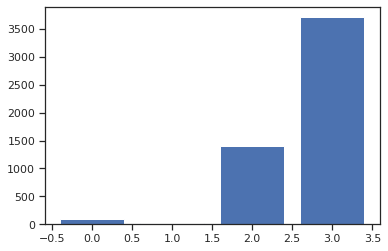

In [ ]:
columnas_modelo = [v for v in columnas_categoricas if v not in ['pollutant']]
features = df_train_enc[columnas_modelo]
target = df_train_enc['pollutant']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)
X_train_fs, X_test_fs, fs, cols = select_features(X_train, y_train, X_test)
graficar_mejores_caracteristicas(fs,cols)

## Creacion del modelo

In [ ]:
from pycaret.classification import *
#clf1 = setup(data = df_train_enc, target = 'pollutant',html=False, silent = True,)

In [ ]:
compare_models()